# <font color = red>Lending Club Case Study - Exploratory Data Analysis </font>

## <font color = blue>Group Members: </font>
#### 1.  Bharat M 
#### 2. Puneet Bansal

### Project Brief

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Importing all the necessary libraries for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading from CSV file using pandas and using low memory flag to load columns with multiple data types.
loan=pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
#View shape and head of the dataframe
shape=loan.shape
print("Number of rows on the dataset is",shape[0])
print("Number of columns on the dataset is",shape[1])
loan.head()

Number of rows on the dataset is 39717
Number of columns on the dataset is 111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <font color='brown'>Data Cleaning</font>

We are dropping 54 columns where entire column contains value NA which is not usefull for our analysis.
Column Names- <font color='orange'>(total_il_high_credit_limit,total_bc_limit,total_bal_ex_mort,tot_hi_cred_lim,percent_bc_gt_75,pct_tl_nvr_dlq,num_tl_op_past_12,num_tl_90g_dpd_24m,
num_tl_30dpd,num_tl_120dpd_2m,num_sats,num_rev_tl_bal_gt_0,num_rev_accts,num_op_rev_tl,num_il_tl,num_bc_tl,num_bc_sats,num_actv_rev_tl,
num_actv_bc_tl,num_accts_ever_120_pd,mths_since_recent_revol_delinq,mths_since_recent_inq,mths_since_recent_bc_dlq,mths_since_recent_bc,
mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,mo_sin_old_il_acct,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,
inq_last_12m,total_cu_tl,inq_fi,total_rev_hi_lim,all_util,max_bal_bc,open_rv_24m,open_rv_12m,il_util,total_bal_il,mths_since_rcnt_il,open_il_24m,open_il_12m,
open_il_6m,open_acc_6m,tot_cur_bal,tot_coll_amt,verification_status_joint,dti_joint,annual_inc_joint,mths_since_last_major_derog)</font>

In [4]:
#Drop columns with value NA
list_col_with_na=['total_il_high_credit_limit','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim','percent_bc_gt_75',
                  'pct_tl_nvr_dlq','num_tl_op_past_12m','num_tl_90g_dpd_24m','num_tl_30dpd','num_tl_120dpd_2m','num_sats',
                  'num_rev_tl_bal_gt_0','num_rev_accts','num_op_rev_tl','num_il_tl','num_bc_tl','num_bc_sats','num_actv_rev_tl',
                  'num_actv_bc_tl','num_accts_ever_120_pd','mths_since_recent_revol_delinq','mths_since_recent_inq',
                  'mths_since_recent_bc_dlq','mths_since_recent_bc','mort_acc','mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op',
                  'mo_sin_old_rev_tl_op','mo_sin_old_il_acct','bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths',
                  'inq_last_12m','total_cu_tl','inq_fi','total_rev_hi_lim','all_util','max_bal_bc','open_rv_24m','open_rv_12m',
                  'il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
                  'tot_cur_bal','tot_coll_amt','verification_status_joint','dti_joint','annual_inc_joint',
                  'mths_since_last_major_derog']
for i in list_col_with_na:
    loan=loan.drop(i,axis=1)
loan.shape

(39717, 57)

We are dropping the 5 columns where entire column contains value 0 and NA which is not useful for our analysis.
Column Names- <font color='orange'>(tax_liens,delinq_amnt,chargeoff_within_12_mths,acc_now_delinq,collections_12_mths_ex_med)</font>

In [5]:
#Drop columns with value 0 and NA
list_col_with_0na=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med']
for i in list_col_with_0na:
    loan=loan.drop(i,axis=1)
loan.shape

(39717, 52)

In [6]:
#Finding percentage of null or missing values and viewing columns which has null values
null_perc=round((loan.isnull().sum())/len(loan.index)*100,2)
null_perc.loc[null_perc>0]

emp_title                  6.19
emp_length                 2.71
desc                      32.58
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

In [7]:
#Removing columns having more than 30% of missing/null values
list_with_nullvalues=null_perc[null_perc>30].index
for i in list_with_nullvalues:
    loan=loan.drop(i,axis=1)
loan.shape

(39717, 48)

In [8]:
#Printing the number unique values for all the columns
list_uniquevalues=loan.nunique()
print(loan.nunique())

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util

We can observe that there are few columns which has one unique values in all the rows, which does not help our analysis. So we can drop those rows.
Column Names- <font color='orange'>(policy_code,application_type,initial_list_status,pymnt_plan)</font>

In [9]:
#Dropping columns having only one value in the entire column
list_dropcols=list(list_uniquevalues[list_uniquevalues==1].index)
for i in list_dropcols:
    loan=loan.drop(i,axis=1)
loan.shape

(39717, 44)

Dropping 23 columns which is not important for our analysis and having customer behaviour variable.
Columns Names-<font color='orange'>(url,zip_code,inq_last_6mths,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveriies,
collection_recovery_fee,last_pymnt_amnt,delinq_2yrs,earliest_cr_line,total_acc,pub_rec,revol_bal,revol_util,last_pymnt_d,last_credit_pull_d,emp_title,title)</font>

In [10]:
#Dropping columns which is not requrired for our analysis and havinf customer behaviour
list_dropcols=['url','title','zip_code','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','delinq_2yrs','emp_title','earliest_cr_line','total_acc','pub_rec','revol_bal','revol_util','last_pymnt_d','last_credit_pull_d']
for i in list_dropcols:
    loan=loan.drop(i,axis=1)
loan.shape

(39717, 21)

In [11]:
#Finding percentage of null or missing values and viewing columns which has null values again
null_perc=round((loan.isnull().sum())/len(loan.index)*100,2)
null_perc.loc[null_perc>0]

emp_length              2.71
pub_rec_bankruptcies    1.75
dtype: float64

We can see only small amount of missing values is seen in this list of columns. So, we can remove all the null/blank rows or impute value.

In [12]:
#Removing all the null/blank rows from dataset
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [13]:
#Finding percentage of null or missing values and showing all the columns null percentage
null_perc=round((loan.isnull().sum())/len(loan.index)*100,2)
null_perc

id                      0.0
member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
open_acc                0.0
pub_rec_bankruptcies    0.0
dtype: float64

For our analysis we only consider loan_status which is Fully paid or Charged off. Neglecting loan_status which is Current.

In [14]:
#Describe column annual income
loan['annual_inc'].describe()

count    3.794500e+04
mean     6.960945e+04
std      6.361049e+04
min      4.000000e+03
25%      4.160400e+04
50%      6.000000e+04
75%      8.323600e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [15]:
#Imputing 145994 for annnual income greater than 145994. We found this using formula Q3+1.5*IVR(83000+1.5*41996)
loan['annual_inc']=loan['annual_inc'].apply(lambda x:145994 if x>145994 else x)

In [16]:
#Removing loan_status rows having Current 
loan=loan[~(loan.loan_status=='Current')]
#View the shape of dataset after data cleaning
loan.shape

(36847, 21)

In [17]:
#Veiw all the column details
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   member_id             36847 non-null  int64  
 2   loan_amnt             36847 non-null  int64  
 3   funded_amnt           36847 non-null  int64  
 4   funded_amnt_inv       36847 non-null  float64
 5   term                  36847 non-null  object 
 6   int_rate              36847 non-null  object 
 7   installment           36847 non-null  float64
 8   grade                 36847 non-null  object 
 9   sub_grade             36847 non-null  object 
 10  emp_length            36847 non-null  object 
 11  home_ownership        36847 non-null  object 
 12  annual_inc            36847 non-null  float64
 13  verification_status   36847 non-null  object 
 14  issue_d               36847 non-null  object 
 15  loan_status        

In [18]:
#Veiw term column from dataset
loan.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

We can see there is extra string 'months' in the column term. We will consider only the interger value indicating the number of months.

In [19]:
#Removing unnecessary string from column term and view the column after cleaning
loan.term=loan.term.apply(lambda x:int(x.split()[0]))
loan.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [20]:
#Veiw interest rate column from dataset
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

We can see there is extra symbol '%' in the column int_rate. We will strip the unnecessary symbol and consider only float value.

In [21]:
#Removing unnecessary symbol from the column and view the column after cleaning
loan.int_rate=loan['int_rate'].astype('string')
loan.int_rate=loan.int_rate.apply(lambda x:float(x[:-1]))
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [22]:
#View employee length column from dataset
loan.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

We can see there is extra characters in column emp_length. We will extract only the interger value. 

In [23]:
#Extracting integer from the column and view the column after cleaning
loan.emp_length=loan.emp_length.apply(lambda x :int("".join(filter(str.isdigit, str(x)))))
loan.emp_length.head()

0    10
1     1
2    10
3    10
5     3
Name: emp_length, dtype: int64

In [24]:
#Changing column to datatime datatype 
loan.issue_d=pd.to_datetime(loan.issue_d, format='%b-%y')

In [25]:
#Converting columns to string
loan.grade=loan['grade'].astype('string')
loan.sub_grade=loan['sub_grade'].astype('string')
loan.home_ownership=loan['home_ownership'].astype('string')
loan.verification_status=loan['verification_status'].astype('string')
loan.loan_status=loan['loan_status'].astype('string')
loan.purpose=loan['purpose'].astype('string')
loan.addr_state=loan['addr_state'].astype('string')

In [26]:
#Viewing the details of the all columns after data cleaning
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   member_id             36847 non-null  int64         
 2   loan_amnt             36847 non-null  int64         
 3   funded_amnt           36847 non-null  int64         
 4   funded_amnt_inv       36847 non-null  float64       
 5   term                  36847 non-null  int64         
 6   int_rate              36847 non-null  float64       
 7   installment           36847 non-null  float64       
 8   grade                 36847 non-null  string        
 9   sub_grade             36847 non-null  string        
 10  emp_length            36847 non-null  int64         
 11  home_ownership        36847 non-null  string        
 12  annual_inc            36847 non-null  float64       
 13  verification_sta

## <font color='brown'>Derived Metrics</font>

Let use convert loan status to continous variable with column name defaulter. If status is fully paid represent it as 0,else 1 for charged off.

In [27]:
#Creating new column defaulter
loan['defaulter']=np.where(loan['loan_status']=="Charged Off",1,0)

Extract month from issue_d which a datetime variable

In [28]:
#Create new coumn issue_d_month
loan['issue_d_month']=loan['issue_d'].dt.month

## <font color='brown'>Univariate Analysis</font>

In [29]:
#Creating a function 
sns.set(style="darkgrid")
def plt_freq(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=22,fig_size_y=5):
    ncount = len(loan)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    ax2.grid(None)# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars

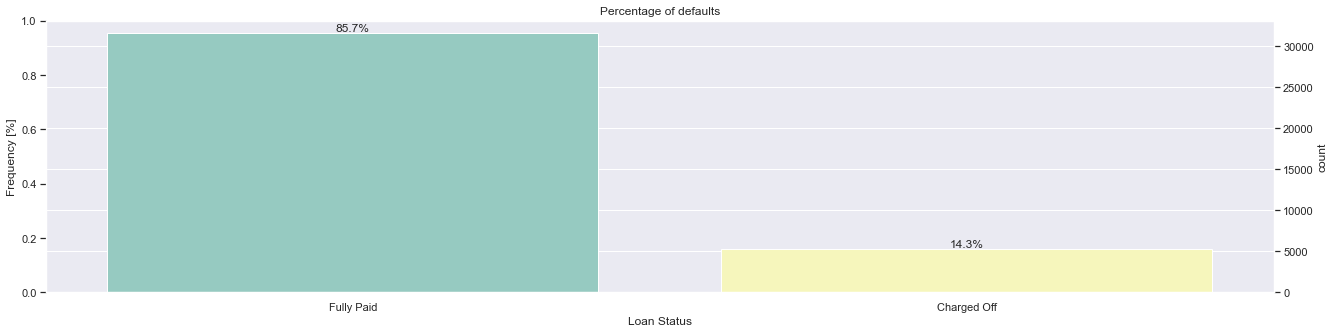

In [30]:
#Finding the percentage of defaulters in the dataset
plt_freq("loan_status",loan,'Loan Status','Percentage of defaults')

There are __14.3%__ of defaulters in this dataset.

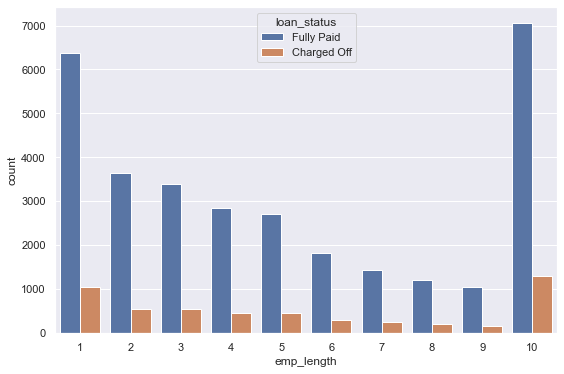

In [31]:
#Univariate analysis on loan status with employee length
plt.figure(figsize=[9,6])
sns.countplot(x="emp_length",data=loan,hue = "loan_status")
plt.show()

There are a greater number of loans for employee having 1 and 10/10+ yrs exp. Lending club should avoid providing loans to borrowers having employee length around 1 yr. Loan can be approved for higher employee exp like 10/ 10+ yrs as 10+ yrs has high Fully_Paid rate.

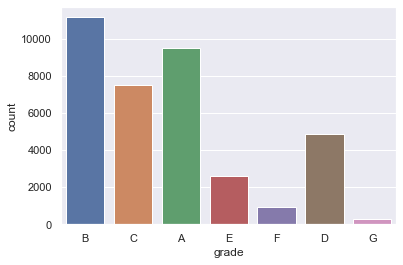

In [32]:
#Finding count of loans taken with respect to grade
sns.countplot(loan.grade)
plt.show()

Most of the loans have grade of A & B.Therefore stating most of the loans are high graded loans

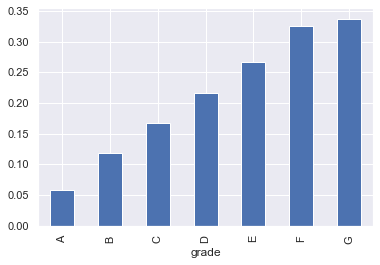

In [33]:
#Finding grade with respect to defaulters
loan.groupby('grade').defaulter.mean().plot.bar()
plt.show()

As we observe for lower grades there are more defaulted loans. In the grade __'G'__ we observe around 33% are charged off which is highest among all the grades. 

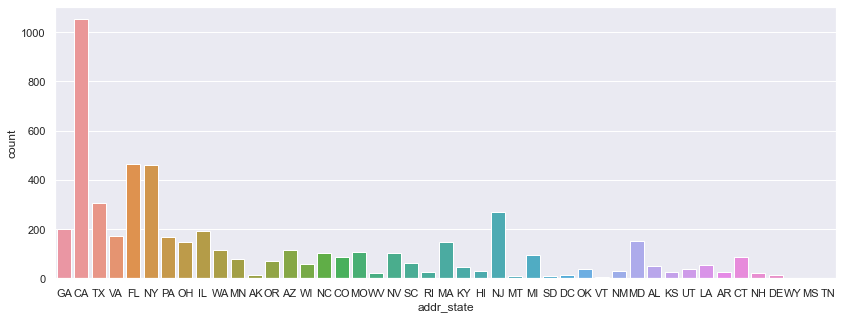

In [34]:
#Count of defaulter on all borrower states 
plt.figure(figsize=[14,5])
sns.countplot(loan[loan.defaulter==1].addr_state)
plt.show()

As we observe on states CA,FL,NY there are more number of defaulter's as compared to other status.

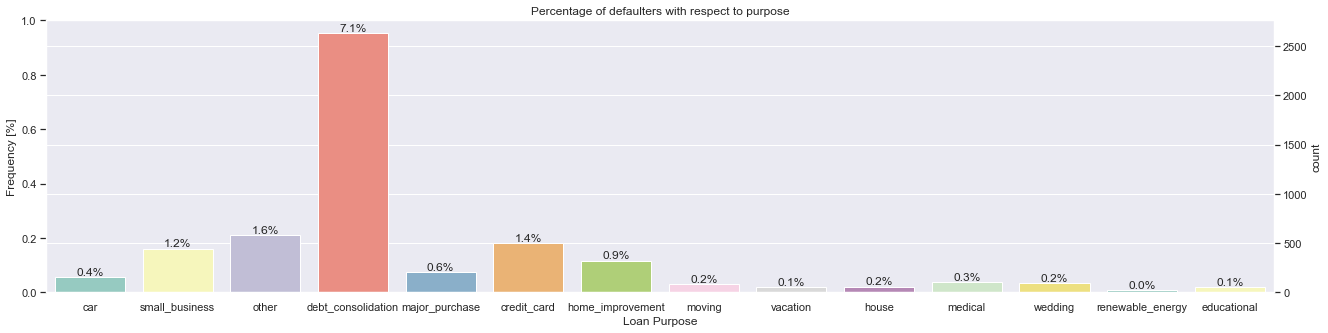

In [35]:
#Defaulted acconts with respect to purpose
plt_freq("purpose",loan[loan.defaulter==1],'Loan Purpose','Percentage of defaulters with respect to purpose')

Most defaulters are having debt_consolidation purpose.

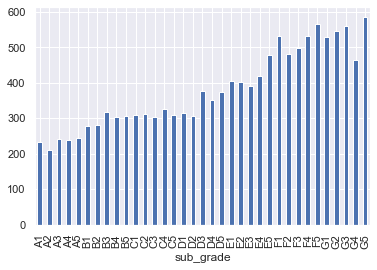

In [36]:
#Analysis on sub-grades with respect to installment of defaulters.
loan[loan.defaulter==1].groupby('sub_grade').installment.mean().plot.bar()
plt.show()

We can see pattern of defaulters are having lower the sub-grade and high installment.

## <font color='brown'>Bivariate Analysis</font>

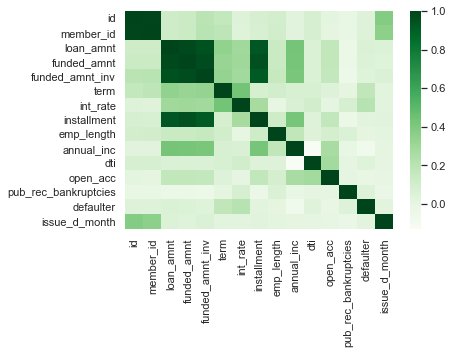

In [37]:
#Finding correlation in the dataset
sns.heatmap(loan.corr(), cmap ="Greens") 
plt.show()

There is a very good correlation with loan_amt,funded_amt,funded_amt_inv,installment.

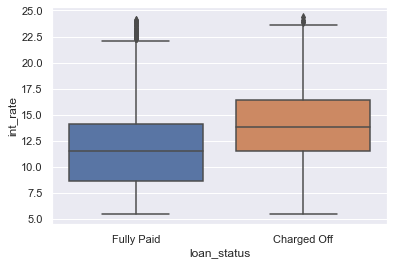

In [38]:
#loan status with respect to interest rate
sns.boxplot(loan.loan_status,loan.int_rate)
plt.show()

As the interest rate increases there is more chances of loan getting defaulted.

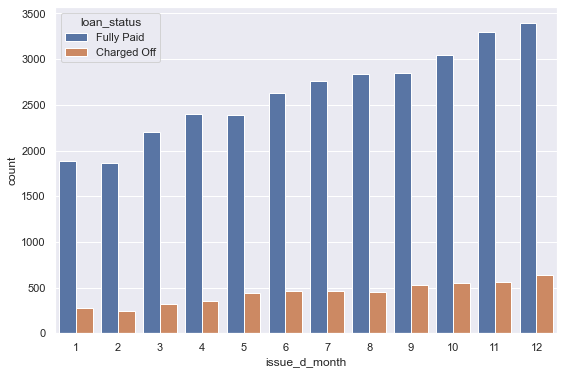

In [39]:
#Analysis of issued month and loan status
plt.figure(figsize=[9,6])
sns.countplot(x="issue_d_month",data=loan,hue = "loan_status")
plt.show()

As we observe the plot, there are more number of defaulters in December month and comparitively less in the start of the year.There is slightly an increase with the number of defaulter after May month.

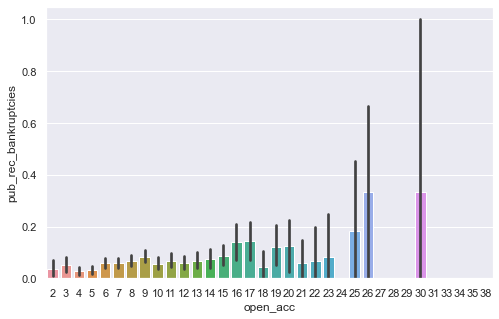

In [40]:
#Impact of number of accounts opened with respect to publc record bankruptcies defaulters
plt.figure(figsize=[8,5])
sns.barplot(loan[loan.defaulter==1].open_acc,loan[loan.defaulter==1].pub_rec_bankruptcies)
plt.show()

As we observe with the number of open account, increases there is more chances of public bankruptcies and defaulters.

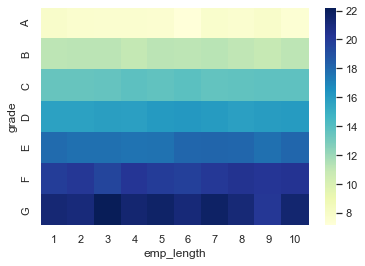

In [41]:
#Analysis with columns grade,int_rate,emp_length
a=loan[loan.defaulter==1].pivot_table(index='grade',values='int_rate',columns='emp_length')
sns.heatmap(a,cmap='YlGnBu')
plt.show()

From the above heatmap we have analysed among variables grade,interest rate and employee length that employee length __3__ with grade __'G'__ has the highest interest rate under defaulter's. Simliarly we have high rate of interest in 'G' grade for employee length 5,7 and 10. Lower the grade more defaulter's.

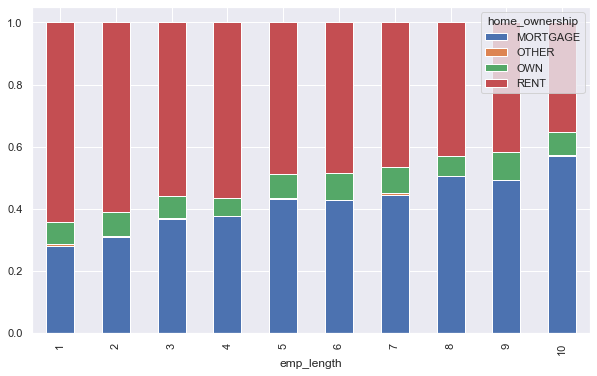

In [42]:
#Analysis with columns emp_length,home_ownership,defaulters
df = pd.pivot_table(data=loan, values="defaulter", index="emp_length", columns="home_ownership", aggfunc=sum)
monthly_perc = df[["MORTGAGE","OTHER","OWN","RENT"]].apply(lambda x: x/x.sum(), axis=1)
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

From the above bar plot we can observe that for employment length=1 and borrowers leaving on rent the defaulter rate is highest. Similiarly the borrower having their own home has very less persentage of defaulters.

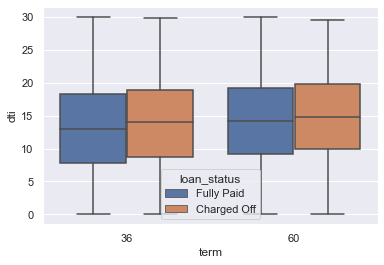

In [43]:
#Analysis on columns term,dti,loan_status
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.show()

As we observe the trend in the above plot, as the term increases with respect to dti there is more chances of becoming default.

In [44]:
#Describe installment
loan.installment.describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

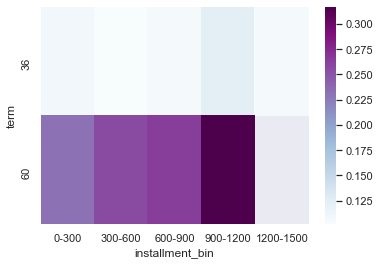

In [45]:
#Anlysis with columns installment_bin,term,defaulter
loan['installment_bin']=pd.cut(loan.installment,bins=5,labels=['0-300','300-600','600-900','900-1200','1200-1500'])
b=loan.pivot_table(index='term',values='defaulter',columns='installment_bin',aggfunc='mean')
sns.heatmap(b,cmap='BuPu')
plt.show()

As the installment amount increases with number of term being 60, there are more chances of becoming defaulter.

In [46]:
#Descrie dti
loan.dti.describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

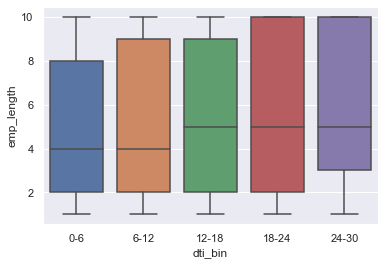

In [47]:
#Creating a bin for dti
loan['dti_bin']=pd.cut(loan.dti,bins=5,labels=['0-6','6-12','12-18','18-24','24-30'])
#dti_bin vs emp_length
sns.boxplot(loan[loan.defaulter==1]['dti_bin'],loan[loan.defaulter==1]['emp_length'])
plt.show()

As we can observe for dti_bin between 18-24 with respect to emp_length there is more spread of defaulter.

In [48]:
#Describe fundded_amnt_inv
loan.funded_amnt_inv.describe()

count    36847.000000
mean     10430.400856
std       7008.919431
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.044685
max      35000.000000
Name: funded_amnt_inv, dtype: float64

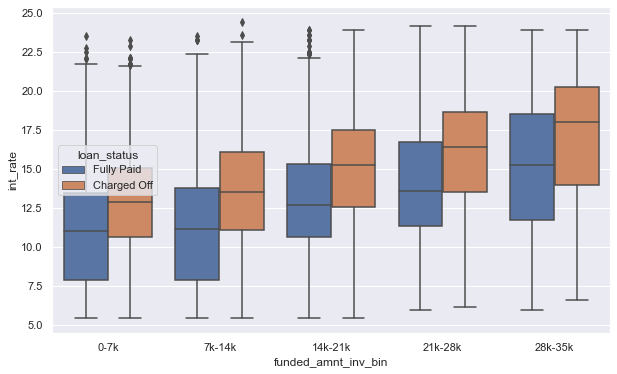

In [49]:
#Creating bin for funded_amnt_inv
loan['funded_amnt_inv_bin']=pd.cut(loan.funded_amnt_inv,bins=5,labels=['0-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
#Analysis on columns funded_amnt_inv_bin,int_rate,loan_status
plt.figure(figsize=[10,6])
sns.boxplot(x='funded_amnt_inv_bin', y='int_rate', hue='loan_status', data=loan)
plt.show()

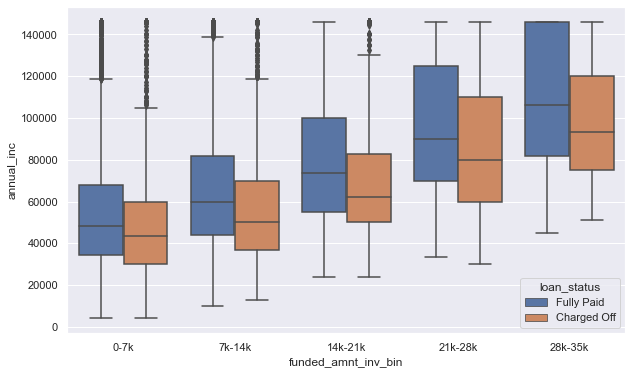

In [50]:
#Analysis on columns funded_amnt_inv_bin,annual_inc,loan_status
plt.figure(figsize=[10,6])
sns.boxplot(x='funded_amnt_inv_bin', y='annual_inc', hue='loan_status', data=loan)
plt.show()

As we observe as funded amount by investor increases with respect to increase in annual income were there is more chances of charged off loans.




##  End